In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([
    (0.5, 0.5), 
    (0.5, 1.0),
    (0.5, 1.5), 
    (0.8, 2.0), 
    (0.6, 1.2), 
    (0.9, 1.3), 
    (1.2, 0.9), 
    (1.5, 0.5) , 
    (1.1, 2.9), 
    (1.5, 3.0), 
    (1.6, 2.5), 
    (1.8, 2.0), 
    (1.9, 3.1), 
    (2.3, 2.8), 
    (2.3, 1.6), 
    (2.9, 1.5)
], np.float32)

label = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]], np.float32).T

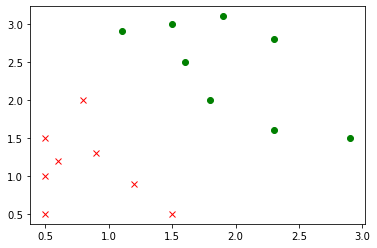

In [14]:
positive = X[label[:, 0] == 1]
negative = X[label[:, 0] == 0]

plt.plot(positive[:, 0], positive[:, 1], "go")
plt.plot(negative[:, 0], negative[:, 1], "rx")

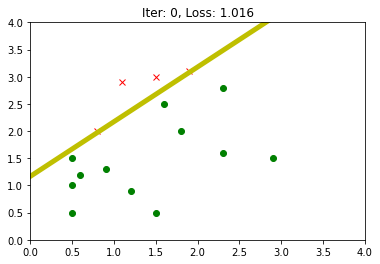

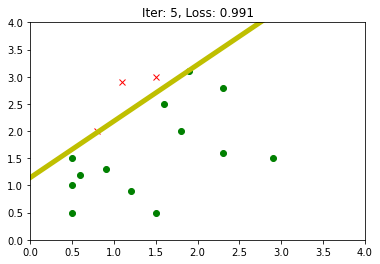

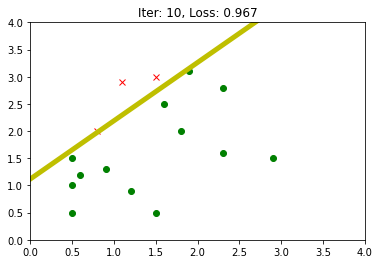

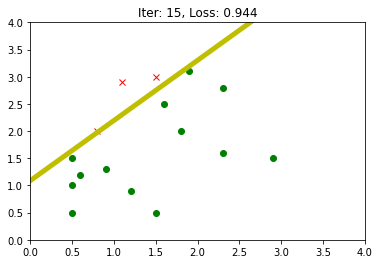

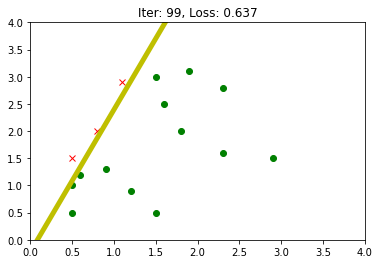

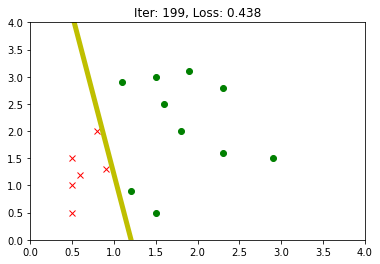

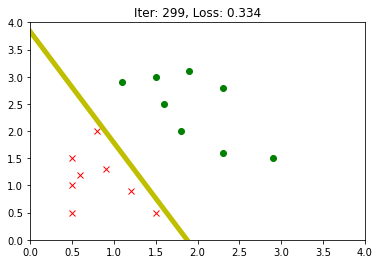

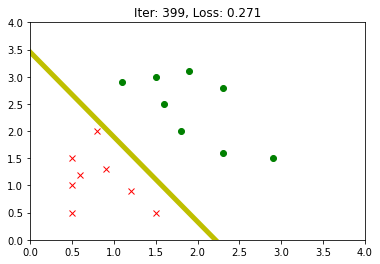

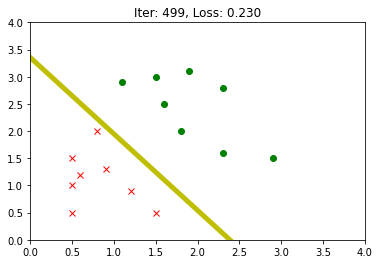

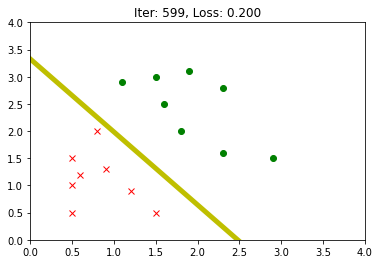

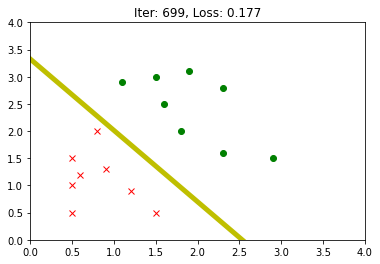

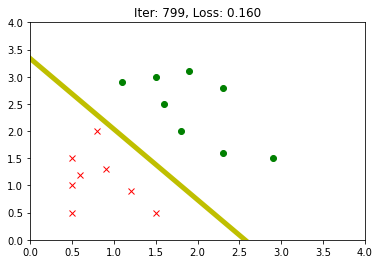

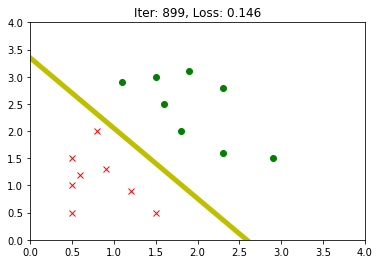

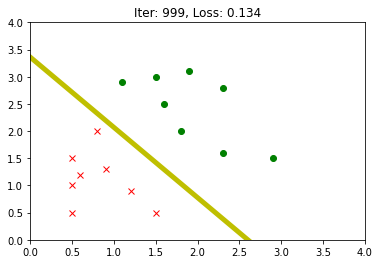

array([[-5.55973686],
       [ 2.13836067],
       [ 1.65441303]])

In [16]:
num_sample  = X.shape[0]
num_feature = X.shape[1]
num_output  = 1
batch_size  = num_sample

# 在列方向，第0列上，增加一列并赋值为全是1
X_hat       = np.insert(X, 0, values=1, axis=1)

# 创建W权重，此时bias和weight是合并的
W           = np.random.normal(0, 1, size=(1 + num_feature, num_output))

lr     = 0.1
epochs = 1000


# 定义压缩函数(0, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


for i in range(epochs):
    
    # 预测值
    predict     = X_hat @ W
    
    # 预测值转换为概率值
    probability = sigmoid(predict)
    
    # Binary Cross Entropy Loss
    loss = -np.sum(label * np.log(probability) + \
                   (1 - label) * np.log(1 - probability)) \
                    / batch_size
    
    # 联合BCE与sigmoid的求导，loss对predict的导数
    delta_predict = (probability - label) / batch_size
    
    # 计算W的导数
    delta_W       = X_hat.T @ delta_predict
    
    # 更新参数
    W            -= lr * delta_W
    
    if (i + 1) % 100 == 0 or i % 5 == 0 and (i / 5) <= 3:
        
        predict     = X_hat @ W
        probability = sigmoid(predict)
        positive    = X[probability[:, 0] >= 0.5]
        negative    = X[probability[:, 0] <  0.5]
        
        # probability == 0.5
        # sigmoid(X_hat @ W) == 0.5
        # X_hat @ W = 0
        # [1, x0, x1] @ [[bias, theta0, theta1]].T = 0
        # x0 * theta0 + x1 * theta1 + bias = 0
        # x1 = -(x0 * theta0 + bias) / theta1
        # x1 -> y,   x0 -> x
        
        # W.shape = 3x1
        bias, theta0, theta1 = W
        tx = np.array([0, 5])
        ty = -(tx * theta0 + bias) / theta1
        
        plt.title(f"Iter: {i}, Loss: {loss:.3f}")
        plt.plot(positive[:, 0], positive[:, 1], "go")
        plt.plot(negative[:, 0], negative[:, 1], "rx")
        plt.plot(tx, ty, "y-", linewidth=5)
        plt.axis([0, 4, 0, 4])
        plt.pause(0.01)
        
W